In [4]:
%matplotlib inline
import pandas as pd
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import matplotlib
matplotlib.rcParams['figure.figsize'] = (11.0, 7.0)
import matplotlib.pyplot as plt
import re
import numpy as np
from  matplotlib.ticker import FuncFormatter
import glob
import os

In [5]:
dfs = []
for path in glob.glob('results/*.log'):
    fn = os.path.basename(path)
    parts = fn.split(".")
    size = int(parts[1])
    iface = parts[2]
    tmp = pd.read_csv(path, names=('iops',))
    tmp["size"] = size
    tmp["iface"] = iface
    dfs.append(tmp)
df = pd.concat(dfs)
df[df["size"] > 32000]

,iops,size,iface
0,1967.810,131073,omap
1,767.927,131073,omap
2,1106.870,131073,omap
3,767.902,131073,omap
4,1215.890,131073,omap
5,620.936,131073,omap
6,383.949,131073,omap
7,722.884,131073,omap
8,652.948,131073,omap
9,274.973,131073,omap


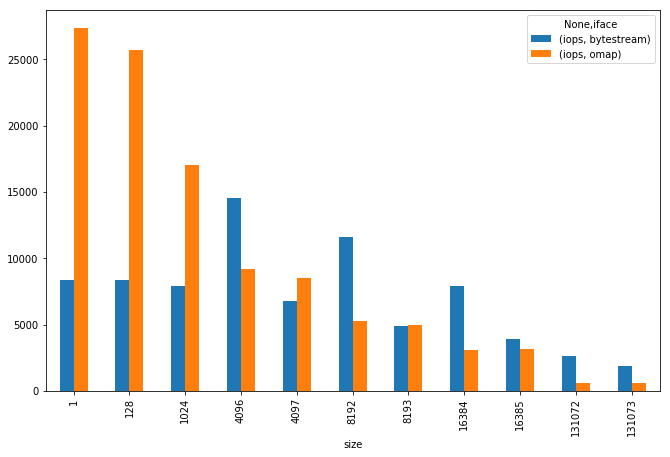

In [6]:
df.groupby(['size', 'iface']).mean().unstack(-1).plot.bar(legend=True)